In [10]:
#importing libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [11]:
#intializing graphprint(graph.has_edge(16, 1))
graph = nx.Graph()

In [12]:
N=15
M=15
li=[]
for i in range(0,N*M):
  temp={"X":i // M,"Y":i % N}
  z=(i,temp)
  li.append(z)

# adding nodes to the graph
graph.add_nodes_from(li)

In [13]:
#defining Wall
wall=[]
for i in range(4,15):
    wall.append((12,i))
for i in range(7,12):
    wall.append((i,2))
for i in range(3,13):
    wall.append((7,i))
for i in range(0,11):
    wall.append((3,i))


In [14]:
for i in range(0,len(graph.nodes())):
    if((graph.nodes[i]['X'],graph.nodes[i]['Y']) not in wall):
        for j in range(0,len(graph.nodes())):
            x_diff = abs(graph.nodes[i]['X']-graph.nodes[j]['X'])
            y_diff = abs(graph.nodes[i]['Y']-graph.nodes[j]['Y'])
            
            if(x_diff <= 1 and y_diff == 0 and x_diff > 0):
                if((graph.nodes[j]['X'],graph.nodes[j]['Y']) not in wall):
                    reward= -1
                    if (graph.nodes[j]['X'] == 14 and graph.nodes[j]['Y']==14):
                        reward=0
                    graph.add_edge(i,j,weight=reward)
                else:
                    reward=-1000
                    graph.add_edge(i,j,weight=reward)
            
            if(x_diff == 0 and y_diff <= 1 and y_diff > 0):
                if((graph.nodes[j]['X'],graph.nodes[j]['Y']) not in wall):
                    reward= -1
                    if (graph.nodes[j]['X'] == 14 and graph.nodes[j]['Y']==14):
                        reward=0
                    graph.add_edge(i,j,weight=reward)
                else:
                    reward=-1000
                    graph.add_edge(i,j,weight=reward)
    


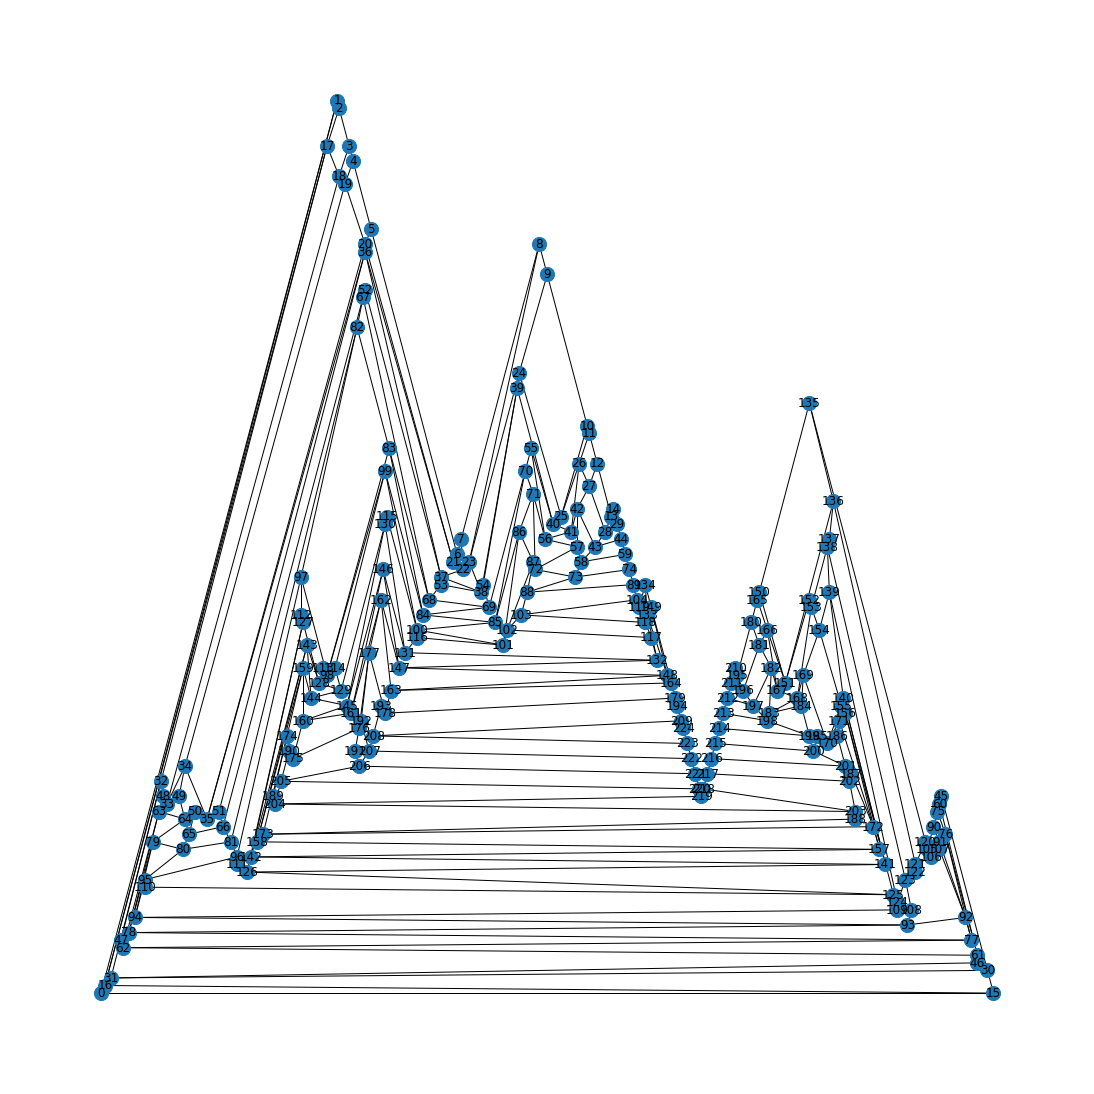

In [15]:
# ploting complete graph
plt.figure(1,figsize=(15,15))
nx.draw_planar(graph,with_labels=True,node_size=200 )
#nx.draw(graph,with_labels=True,font_size=8)
plt.savefig("graph-2.png")

In [19]:
# defining herustic function
def hesru(a,b):
    s=abs(graph.nodes[a]['X']-graph.nodes[b]['X'])+abs(graph.nodes[a]['Y']-graph.nodes[b]['Y'])
    #print(a,b)
    return s

In [20]:
start = timer()
ansi=nx.astar_path(graph,0,224,hesru)
end = timer()

dis=nx.astar_path_length(graph,0,224,hesru)
print("time taken :",end-start)


In [ ]:
print(ansi)
print(dis)

[0, 1, 2]
-2
